#1. 통계량 계산

0. 데이터 읽기

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp

data = pd.read_csv("creditset2.csv")


1. 공분산

In [ ]:
import numpy as np
import scipy as sp

A=data.age
B=data.income

print(sp.cov(A,B))   #공분산

[[ 1.75892573e+02 -6.64700713e+03]
 [-6.64700713e+03  2.05243649e+08]]


<ipython-input-2-8225b8473483>:7: DeprecationWarning: scipy.cov is deprecated and will be removed in SciPy 2.0.0, use numpy.cov instead
  print(sp.cov(A,B))   #공분산


2. 상관관계

In [ ]:
import numpy as np
from scipy import stats

A=data.age
B=data.income
C=data.loan

print(stats.pearsonr(A,B))   #상관관계
print(stats.pearsonr(A,C))   #상관관계


PearsonRResult(statistic=-0.03498384417456003, pvalue=0.11781153401973968)
PearsonRResult(statistic=0.006561002944344477, pvalue=0.769341242097694)


3. Paired T-test

In [ ]:
from scipy import stats
before_ad = [100, 110, 105, 115, 100, 90]
after_ad = [140, 130, 115, 125, 110, 110]

tTestResult= stats.ttest_rel(before_ad, after_ad)
print(tTestResult)

TtestResult(statistic=-3.8413666267326794, pvalue=0.012106854691433334, df=5)


4. 분산분석과 다중비교

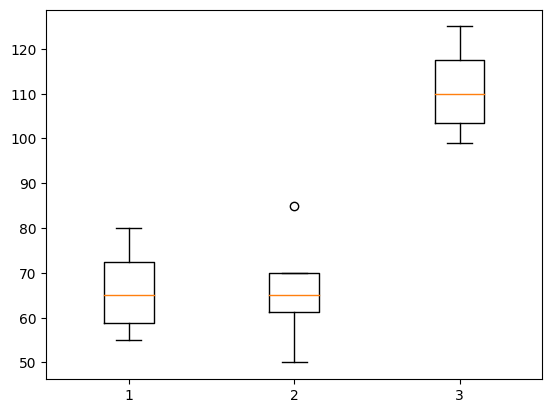

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

group1 = [60, 70, 80, 55]
group2 = [50, 65, 85, 65]
group3 = [105, 115, 99, 125]
plot_data = [group1, group2, group3]

ax = plt.boxplot(plot_data)
plt.show()


In [ ]:
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=17.419898513954344, pvalue=0.0008047905831477702)

In [ ]:
values = [60, 70, 80, 55 ,50, 65, 85, 65, 105, 115, 99, 125]
group = [1,1,1,1,2,2,2,2,3,3,3,3]

tukey = pairwise_tukeyhsd(endog=values,     # Data
                          groups=group,   # Groups
                          alpha=0.05)          # Significance level
tukey.summary()              # See test summary


group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.0,1.0,-24.4422,24.4422,False
1,3,44.75,0.0016,20.3078,69.1922,True
2,3,44.75,0.0016,20.3078,69.1922,True


5. scipy 이용 선형회귀분석

In [ ]:
import pandas as pd
df = pd.read_csv("adv.csv")
df.columns
X=df.TV
Y=df.sales

In [ ]:
df[ ["TV", "sales"]]

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [ ]:
from scipy import stats
model1 = stats.linregress( X,Y) #linear regression
model1

LinregressResult(slope=0.0475366404330197, intercept=7.032593549127702, rvalue=0.7822244248616063, pvalue=1.4673897001948012e-42, stderr=0.0026906071877968703, intercept_stderr=0.4578429402734785)

In [ ]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
line_fitter = LinearRegression().fit(df[["TV","radio"]], df.sales)
line_fitter.coef_
line_fitter.intercept_

#line_fitter.fit(train_df.drop('sales', axis=1), train_df.sales)

#df에 scaling을 적용해보세요, StandardScaler를 사용하세요
from sklearn.preprocessing import StandardScaler
df = pd.DataFrame( StandardScaler().fit_transform(df), columns=df.columns)
#scaler = StandardScaler()
#scaled = scaler.fit_transform( df )
#df = pd.DataFrame( scaled, columns=df.columns)
#df를 train, test로 파티셔닝해주세요( 8:2)
train, test = train_test_split( df, test_size=0.2)
#train으로 linear regression을 해주세요, 모형이름을 model로 해주세요.
model = LinearRegression().fit( train.drop(['sales', 'Unnamed: 0'], axis=1),
                               train.sales)
#X변수: TV, radio, newspaper, Y변수: sales
#model.coef_, model.intercept_
pred = model.predict( test[["TV", "radio", "newspaper"]])
import numpy as np
np.mean(   (pred - test.sales)**2  )  #Mean Squared Error
np.sqrt( np.mean(   (pred - test.sales)**2  ) ) #Rooted Mean Squared Error

0.4281274121835095

In [ ]:
import pandas as pd
df2 = pd.DataFrame( [[1,2,3], [4,5,6]])
df2.iloc[ :, 1]

0    2
1    5
Name: 1, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
df = df.iloc[:, 1:5]

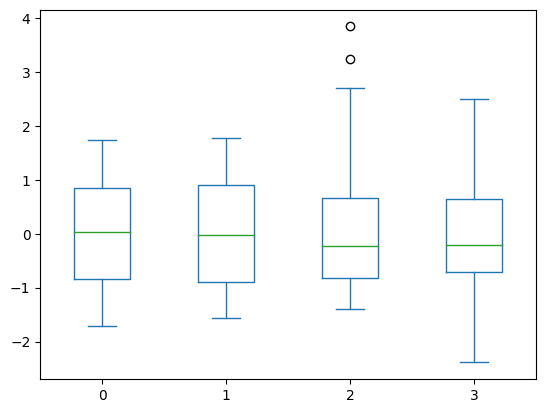

In [ ]:

imputer = SimpleImputer(strategy='mean')
imputer.fit(df)
df3_imputed = imputer.transform(df)
df3_imputed_df = pd.DataFrame( df3_imputed )
df3_imputed_df.plot.box()
scaler = StandardScaler()
df3_scaled = scaler.fit_transform(df3_imputed)
train, test = train_test_split( df3_scaled, test_size=0.3)



In [ ]:
train_df = pd.DataFrame( train, columns = df.columns)
test_df = pd.DataFrame( test, columns = df.columns)

In [ ]:
train_df.drop('sales', axis=1) #inplace=True

,TV,radio,newspaper
0,-0.908957,-0.186635,-0.564074
1,-1.498640,-0.753833,-0.329312
2,-1.214892,0.177992,-0.462804
3,-0.424367,1.170588,1.502755
4,-0.582005,-1.469583,-0.025502
...,...,...,...
135,1.602739,-0.855118,-1.111852
136,1.379711,-1.375050,0.572912
137,-1.516155,-1.294022,0.048149
138,1.568876,1.103065,1.162119


In [ ]:
from sklearn.linear_model import LinearRegression
line_fitter = LinearRegression()
line_fitter.fit(train_df.drop('sales', axis=1), train_df.sales)

LinearRegression()

In [ ]:
y_predicted = line_fitter.predict(test_df.drop('sales', axis=1))

In [ ]:
np.mean( (y_predicted-test_df.sales)**2 )

0.07457977000275537

# 2. 선형회귀분석 연습
- 연습1

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]



In [ ]:
import numpy as np
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = scaler.fit_transform(data)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(features, target, test_size=0.3)

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

print(regr.score(X_train, Y_train))	#R^2, 결정계수
print(np.mean( np.square( regr.predict(X_test) - Y_test ) ))  #MSE
print(regr.predict(X_test[1,].reshape(1,13)))

0.764567335619148
28.90532802878914
[32.43520126]


In [ ]:
#boston 데이터셋 중에서 CRIM, RM, TAX 변수를 X로 하셔서 회귀분석하세요
#y는 dataset['target']을 사용하세요
# MinMaxScaling, 8:2 Partitioning, LinearRegression
# Test셋에 대한 RMSE를 구해보세요.
# 50분까지 해보세요~
X =data[:, [0, 5, 9]]
y = target

from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler().fit_transform( X )

X_train, X_test, y_train, y_test =train_test_split( scaled, y,
                                                   test_size=0.2)
#.....

- 연습2
- LR+DV
 - Well : well index
 - Por : well average porosity (%)
 - Perm : permeability (mD)
 - AI : accoustic impedance (kg/m2s*10^6)
 - Brittle : brittleness ratio (%)
 - TOC : total organic carbon (%)
 - VR : vitrinite reflectance (%)
 - Prod : gas production per day (MCFD) - Response Variable

In [ ]:
import pandas as pd
from sklearn import linear_model
import numpy as np

df = pd.read_csv('unconv_MV_v5.csv')

In [ ]:
import numpy as np

features = ['Por']
target = 'Prod'
df[features].values.reshape(-1, len(features)).shape #200,1

(200, 1)

In [ ]:
#X변수가 1개인 경우에만 아래처럼...
X = df[features].values.reshape(-1, len(features))  #2차원으로 변경 필요
y = df[target].values

In [ ]:
print(X.shape)
print(y.shape)

(200, 1)
(200,)


In [ ]:
ols = linear_model.LinearRegression()
model = ols.fit(X, y)

In [ ]:
print( model.coef_ )
model.intercept_

[287.78074285]


-2.944431053714652

In [ ]:
model.score(X, y) #R-squared

0.7428880535051593

- porosity 15%에서의 Production?

In [ ]:
x_pred = np.array([15])
x_pred = x_pred.reshape(-1, len(features))
model.predict(x_pred)

array([4313.76671169])

In [ ]:
x_pred = np.array([14, 18])
x_pred = x_pred.reshape(-1, len(features))
model.predict(x_pred)

array([4025.98596884, 5177.10894024])

In [ ]:
# 위의 자료를 이용하셔서 X변수는 por, brittle, toc, y변수는 prod
X=df[["Por", "Brittle", "TOC"]]
y=df.Prod
# x변수는 standard scaling
scaled = StandardScaler().fit_transform( X )
# 7:3으로 파티셔닝,
X_train, X_test, y_train, y_test = train_test_split( scaled, y, test_size=0.3)
# train으로 회귀모형
model = LinearRegression().fit( X_train, y_train )
print( model.score(X_train, y_train))
# test로 RMSE 계산해보세요.
np.sqrt( np.mean( (model.predict( X_test) - y_test)**2 ) )

0.9428662684981495


264.5095289957653

- DV

In [ ]:
x_pred = X[0:5]
y_pred = model.predict(x_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


- 다중회귀

In [ ]:
features = ['Por', 'Brittle', 'Perm', 'TOC']
target = 'Prod'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

In [ ]:
print(model.coef_)
model.intercept_

[244.60011793  31.58801063  86.87367291 325.19354135]


-1575.2734966267144

In [ ]:
model.score(X, y)

0.9516996043535946

 - Por = 12 (%)
 - Brittle = 81 (%)
 - VR = 2.31 (%)
 - AI = 2.8 (kg/m2s*10^6)

In [ ]:
x_pred = np.array([12, 81, 2.31, 2.8])
x_pred = x_pred.reshape(-1, len(features))
model.predict(x_pred)

array([5029.77688021])

- 다중공선성(Multi colinearity)
 - 다중공선성이 있으면 X변수들에 따라 계수가 변동

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('unconv_MV_v5.csv')
df = df.iloc[:, 1:-1] #x변수들만

corr = df.corr(method='spearman')

<Axes: >

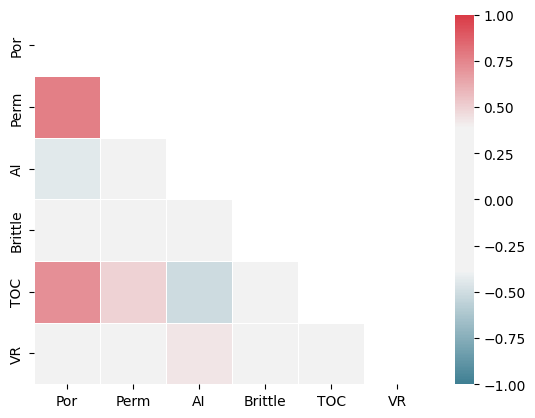

In [ ]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)



- 선형회귀모형 시각화

In [ ]:
df = pd.read_csv("unconv_MV_v5.csv")
df.head(10)

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832
5,6,14.53,4.81,2.69,53.60,0.94,1.67,4395.763259
6,7,13.49,3.60,2.93,63.71,0.80,1.85,4104.400989
7,8,11.58,3.03,3.25,53.00,0.69,1.93,3496.742701
8,9,12.52,2.72,2.43,65.77,0.95,1.98,4025.851153
9,10,13.25,3.94,3.71,66.20,1.14,2.65,4285.026122


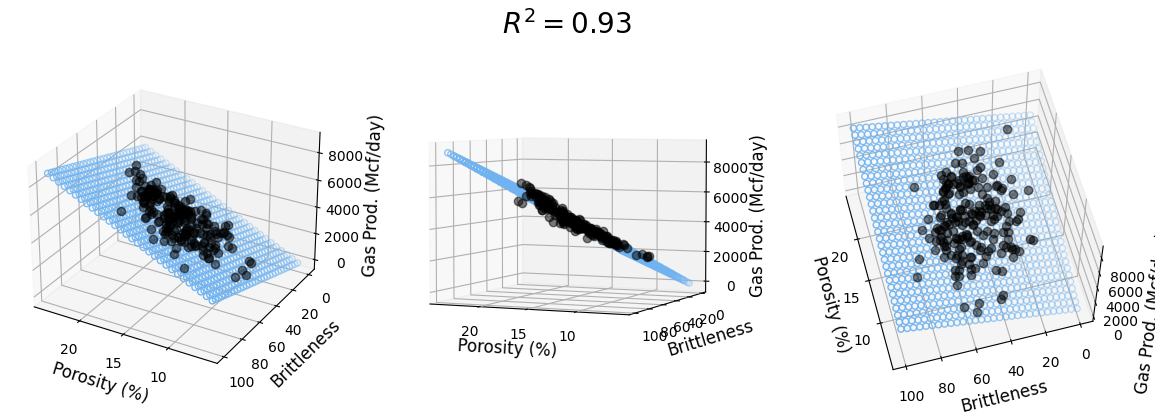

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#데이터 준비
X = df[['Por', 'Brittle']].values.reshape(-1,2)
Y = df['Prod']

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

#학습
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)
r2 = model.score(X, Y)

plt.style.use('default')
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=12)
    ax.set_ylabel('Brittleness', fontsize=12)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

#각도 조정
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)
fig.tight_layout()

- 다른 시각화

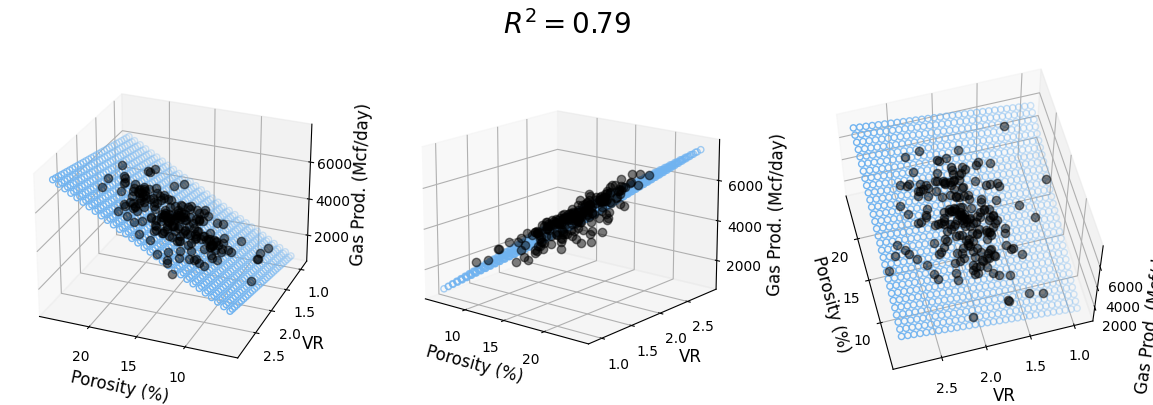

In [ ]:
X = df[['Por', 'VR']].values.reshape(-1,2)
Y = df['Prod']

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)      # range of porosity values
y_pred = np.linspace(0.93, 2.9, 30)  # range of VR values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

#학습
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)
r2 = model.score(X, Y)

#시각화

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=12)
    ax.set_ylabel('VR', fontsize=12)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [ ]:
#GIF파일 생성
for ii in np.arange(0, 360, 1):
    ax.view_init(elev=32, azim=ii)
    fig.savefig('gif_image%d.png' % ii)

#3. statmodels 사용

In [ ]:
features = ['Por', 'Brittle', 'Perm', 'TOC']
target = 'Prod'

X = df[features]  #.values.reshape(-1, len(features))
y = df[target].values

In [ ]:
import statsmodels.api as sm
model = sm.OLS(y, X)    #OLS: Ordinary Least Square
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          1.063e+04
Date:                Thu, 27 Jun 2024   Prob (F-statistic):                   6.70e-228
Time:                        15:04:01   Log-Likelihood:                         -1424.3
No. Observations:                 200   AIC:                                      2857.
Df Residuals:                     196   BIC:                                      2870.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
#df에서 X변수들간의 correlation을 체크해보세요
#por 변수와 함께, corr이 낮은 X 변수들을 선택하세요
df.corr()
X = df[["Por", "AI", "Brittle"]]
y = df.Prod
#X 변수를 scaling
scaled = StandardScaler().fit_transform( X)

#파티셔닝(7:3)
X_train, X_test, y_train, y_test = train_test_split( scaled, y, test_size=0.3)

#sm.OLS로 회귀모형을 model 만들어보시고, 계수에 대한 p-value와 결정계수를 확인하세요
import statsmodels.api as sm
X_train = sm.add_constant( X_train)
model = sm.OLS( y_train, X_train)
print( model.fit().summary() )


                            OLS Regression Results                            
Dep. Variable:                   Prod   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     675.4
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           1.84e-81
Time:                        15:04:01   Log-Likelihood:                -970.55
No. Observations:                 140   AIC:                             1949.
Df Residuals:                     136   BIC:                             1961.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4308.2918     21.539    200.023      0.0

In [ ]:
X_test.shape

(60, 3)

In [ ]:
X = df[features]  #.values.reshape(-1, len(features))
y = df[target].values
X = sm.add_constant(X)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     960.6
Date:                Thu, 27 Jun 2024   Prob (F-statistic):          4.54e-127
Time:                        15:04:01   Log-Likelihood:                -1360.2
No. Observations:                 200   AIC:                             2730.
Df Residuals:                     195   BIC:                             2747.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1575.2735    119.064    -13.231      0.0

In [ ]:
import statsmodels.api as sm
reg = sm.OLS.from_formula("Prod ~ Por+Brittle+Perm+TOC", df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   Prod   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     960.6
Date:                Thu, 27 Jun 2024   Prob (F-statistic):          4.54e-127
Time:                        15:04:01   Log-Likelihood:                -1360.2
No. Observations:                 200   AIC:                             2730.
Df Residuals:                     195   BIC:                             2747.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1575.2735    119.064    -13.231      0.0

In [ ]:
from statsmodels.formula.api import ols
model = ols(formula = "Prod ~ Por+Brittle+Perm+TOC",data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Prod   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     960.6
Date:                Thu, 27 Jun 2024   Prob (F-statistic):          4.54e-127
Time:                        15:04:01   Log-Likelihood:                -1360.2
No. Observations:                 200   AIC:                             2730.
Df Residuals:                     195   BIC:                             2747.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1575.2735    119.064    -13.231      0.0

In [ ]:
X = df.loc[0:10, features]
model.predict(X)

0     4581.655627
1     3507.380732
2     4668.052396
3     4941.935607
4     3943.748339
5     4395.427883
6     4309.754307
7     3418.971205
8     4109.893694
9     4469.807278
10    4766.440056
dtype: float64

#4. 머신러닝 회귀

In [ ]:
!pip install rfpimp

  Preparing metadata (setup.py) ... done
  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10650 sha256=d622e057dedab8d6b3bcaa3e3f4a47fb465139c3df08409fdb4324cd5c26bca6
  Stored in directory: /root/.cache/pip/wheels/6a/12/08/d5bc35127c8d69d39c1f3736a95419ab4763cc0c80ed65bf41
Successfully built rfpimp


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

df = pd.read_csv('unconv_MV_v5.csv')
features = ['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR', 'Prod']

#전처리
df_train, df_test = train_test_split(df, test_size=0.20)
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('Prod',axis=1), df_train['Prod']
X_test, y_test = df_test.drop('Prod',axis=1), df_test['Prod']

#학습

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

np.mean( (y_test - dt.predict(X_test))**2)


227737.6146141056

34502.943684479804


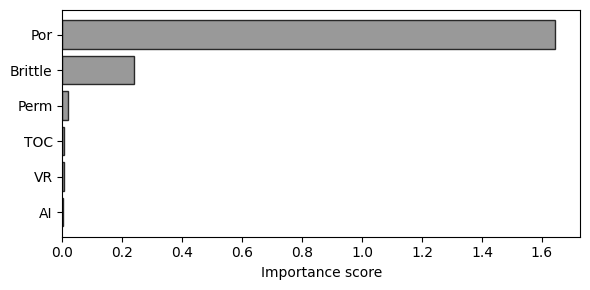

In [ ]:
import rfpimp
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df = pd.read_csv('unconv_MV_v5.csv')
features = ['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR', 'Prod']

#전처리
df_train, df_test = train_test_split(df, test_size=0.20)
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('Prod',axis=1), df_train['Prod']
X_test, y_test = df_test.drop('Prod',axis=1), df_test['Prod']

#학습

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

print( np.mean( (y_test - rf.predict(X_test))**2) )

#변수 중요도 및 시각화
imp = rfpimp.importances(rf, X_test, y_test)

fig, ax = plt.subplots(figsize=(6, 3))
ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
plt.gca().invert_yaxis()
fig.tight_layout()